# Исследование объявлений о продаже квартир (учебный проект Яндекс.Практикум)

## Описание проекта

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Задача — установить параметры, которые влияют на цену недвижимости и степень их влияния.

## Содержание:
1. [Знакомство с данными.](#1)
2. [Предобработка данных.](#2)
3. [Расчет производных данных.](#3)
4. [Исследовательский анализ данных.](#4)
5. [Выводы.](#5)

### 1. Знакомство с данными. <a id=1><a>

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [362]:
# ознакомимся с внешним видом таблицы
df = pd.read_csv('real_estate_data.csv', sep='\t')
display(df.head(30))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [363]:
# посмотрим на характеристики сета данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [364]:
# проверим на явные дубликаты строк
df.duplicated().sum()

0

In [365]:
# ознакомимся с основными статистическими характеристиками распределений
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Выводы по ознакомлению с данными

1. Присутствуют пропуски в колонках:  
ceiling_height    
floors_total  
living_area    
is_apartment  
kitchen_area  
balcony  
locality_name  
airports_nearest         
cityCenters_nearest    
parks_around3000        
parks_nearest          
ponds_around3000       
ponds_nearest          
days_exposition
2. Из-за отсутствия дробных значений, лучше привести к целочисленному виду колонки:  
last_price 
floors_total 
balcony  
airports_nearest   
cityCenters_nearest    
parks_around3000    
parks_nearest   
ponds_around3000   
ponds_nearest    
days_exposition  
3. Даты размещения не в формате dt
4. Предварительно, полные дубликаты отсутствуют.

### 2. Предобработка данных <a id=2><a>

Убираем пропуски. Для данного исследования, везде где не прослеживается очевидная логика пропусков, и нет явного способа адекватно расчитать пропущенные значения, заменим пропуски на экстремальные значения. Тогда, в последующем, их можно будет отфильтровать при необходимости.

In [427]:
# 1. ceiling_height
print('Пропусков в ceiling_height: ')
print(df['ceiling_height'].isna().sum(),'\n')
# пропуски в ceiling_height заменяем экстремальными значениями для последующей фильтрации
df.loc[:,'ceiling_height'] = df.loc[:,'ceiling_height'].fillna(-111)
print('Пропусков в ceiling_height после подстановки: ')
print(df['ceiling_height'].isna().sum())

Пропусков в ceiling_height: 
0 

Пропусков в ceiling_height после подстановки: 
0


In [428]:
# 2. floors_total
print('Пропусков в floors_total: ')
print(df['floors_total'].isna().sum(),'\n')
# посмотрим на пропуски в floors_total
#df[df['floors_total'].isna() == True]
# закономерности визуально не прослеживаются.
# заменяем экстремальными значениями для последующей фильтрации
df.loc[:,'floors_total'] = df.loc[:,'floors_total'].fillna(-111)
print('Пропусков в floors_total после подстановки: ')
print(df['floors_total'].isna().sum())

Пропусков в floors_total: 
0 

Пропусков в floors_total после подстановки: 
0


In [368]:
# 3. living_area
print('Пропусков в living_area: ')
print(df['living_area'].isna().sum())

Пропусков в living_area: 
1903


Отберем строки без пропусков в living_area, чтобы посмотреть, есть ли зависимость между 'living_area' и 'total_area'

In [369]:
clean_area_data = df[df['living_area'].isna() != True]
# определим долю нежилой площади в общей площади
clean_area_data['not_living_area%'] = (clean_area_data['total_area'] - clean_area_data['living_area']) / clean_area_data['total_area']
# посмотрим плотность распределения долей
print('Характеристии распределения долей нежилой площади:')
print(clean_area_data['not_living_area%'].describe())

Характеристии распределения долей нежилой площади:
count    21796.000000
mean         0.435234
std          0.105368
min          0.000000
25%          0.362120
50%          0.432140
75%          0.504823
max          0.978417
Name: not_living_area%, dtype: float64


<ipython-input-369-06c1e359099d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_area_data['not_living_area%'] = (clean_area_data['total_area'] - clean_area_data['living_area']) / clean_area_data['total_area']


Величина стандартного отклонения всего 0.1 говорит о том, что в ,большинстве случаев, доля нежилой площади в общей находится в непосредственной близости от медианы 0,43.

Проверим эту теорию определив взаимосвязь 'total_area' и 'living_area'

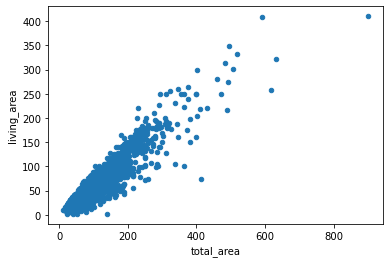

Взаимосвязь total_area и living_area:


,total_area,living_area
total_area,1.000000,0.939537
living_area,0.939537,1.000000


In [370]:
clean_area_data.plot(x='total_area', y='living_area', kind='scatter')
plt.show()
print('Взаимосвязь total_area и living_area:')
display(clean_area_data[['total_area','living_area']].corr())

Корреляция 0.94 - это почти прямо пропорциональная связь. Значит доля нежилой площади, которая связывет эти значения так же будет стабильна.

Произведем замену отсутствующих значений 'living_area' через расчет от 'total_area' и медианной доли нежилой площади 0.43

In [371]:
# функция расчета living_area
def fillna_living_area(row):
    if row['living_area'] >= 0:
        living_area = row['living_area']
        return living_area
    else:
        living_area = row['total_area'] - row['total_area'] * 0.43 
        return living_area

# заменяем значения       
df['living_area'] = df.apply(fillna_living_area, axis = 1)

print('Пропусков в living_area после подстановки: ')
print(df['living_area'].isna().sum())

Пропусков в living_area после подстановки: 
0


Даже в Москве по некоторым оценкам доля аппартаментов на вторичном рынке составляет всего около 6% https://www.irn.ru/news/131197.html
Учитывая, что в выборке помимо СПБ присутствуют другие не крупные населенные пункты, велика вероятность того, что все не заполненные значения is_appartment, это обычные квартиры. 
Это дополнительно подтверждается тем, что в данных выборки, где параметр is_appartment указан, доля аппартаментов так же менее 2%. Возможно, авторы объявлений о продаже квартир вообще не считают нужным заполнять этот параметр, если их квартира не аппартаменты.
Допустимо заполнить пропуски значением False.

In [372]:
# 4. is_apartment
print('Пропусков в is_apartment: ')
print(df['is_apartment'].isna().sum(),'\n')

print('Количество квартир аппартаментов: ')
print(df[df['is_apartment'] == True]['is_apartment'].sum(),'\n')

df['is_apartment'] = df['is_apartment'].fillna(False)

print('Пропусков в is_apartment после подстановки: ')
print(df['is_apartment'].isna().sum())


Пропусков в is_apartment: 
20924 

Количество квартир аппартаментов: 
50 

Пропусков в is_apartment после подстановки: 
0


In [373]:
# 5. kitchen_area

print('Пропусков в kitchen_area: ')
print(df['kitchen_area'].isna().sum(),'\n')

#пробуем установить закономерности размера кухни
print('Взаимосвязь параметров площади:')
print(df[['kitchen_area', 'total_area', 'living_area']].corr(),'\n')
print(df['kitchen_area'].describe(),'\n')
#низкая корелляция с другими показателями и большое стандартоне отклонение
# прямые закономерности не прослеживаются

# заменяем экстремальными значениями для обеспечения возможности последующей фильтрации
df.loc[:,'kitchen_area'] = df.loc[:,'kitchen_area'].fillna(-111)

print('Пропусков в kitchen_area после подстановки: ')
print(df['kitchen_area'].isna().sum())


Пропусков в kitchen_area: 
2278 

Взаимосвязь параметров площади:
              kitchen_area  total_area  living_area
kitchen_area      1.000000    0.609121     0.436162
total_area        0.609121    1.000000     0.946045
living_area       0.436162    0.946045     1.000000 

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64 

Пропусков в kitchen_area после подстановки: 
0


Попытаемся выяснить природу пропусков в количестве дней экспозиции. 

In [374]:
# 6.dadays_exposition

print('Пропусков в days_exposition: ')
print(df['days_exposition'].isna().sum())

Пропусков в days_exposition: 
3181


Для этого посмотрим есть ли зависимость пропусков в days_exposition от даты публикации.

Пропусков в days_exposition в зависимости от даты публикации:


<ipython-input-375-7c442635a648>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exposition_data['isna_days_exposition'] = exposition_data['days_exposition'].isna()


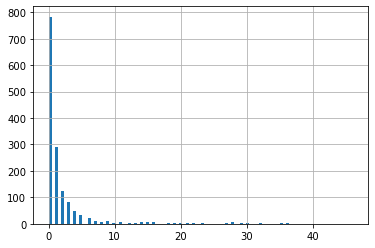

In [375]:
exposition_data = df[['days_exposition','first_day_exposition']]
exposition_data['isna_days_exposition'] = exposition_data['days_exposition'].isna()
print('Пропусков в days_exposition в зависимости от даты публикации:')
exposition_data.groupby('first_day_exposition')['isna_days_exposition'].sum().hist(bins=100)
plt.show()

Очевидно, недавно выставленные и, видимо, еще не проданные квартиры чаще отмечены NaN. Чтобы фильтровать по необходимости еще не проданные квартиры достаточно будет заменить пропуски на экстремальные значения.

In [376]:
# заменим пропуски на экстремальные значения
df['days_exposition']= df['days_exposition'].fillna(-111)

print('Пропусков в days_exposition после подстановки:')
print(df['days_exposition'].isna().sum())

Пропусков в days_exposition после подстановки:
0


Логика, что люди не отмечают в объявлениях параметры, которые к ним не относятся, может быть применена к колонкам:    
balcony     
parks_around3000    
ponds_around3000       
Тогда, пропуски в колонках определим как нулевые значения.

In [377]:
# 7. parks_around3000
print('Пропусков в parks_around3000: ')
print(df['parks_around3000'].isna().sum(),'\n')

df.loc[:,'parks_around3000'] = df.loc[:,'parks_around3000'].fillna(0)
print('Пропусков в parks_around3000 после подстановки:')
print(df['parks_around3000'].isna().sum())

Пропусков в parks_around3000: 
5518 

Пропусков в parks_around3000 после подстановки:
0


In [378]:
# ponds_around3000
print('Пропусков в ponds_around3000: ')
print(df['ponds_around3000'].isna().sum(),'\n')

df.loc[:,'ponds_around3000'] = df.loc[:,'ponds_around3000'].fillna(0)
print('Пропусков в ponds_around3000 после подстановки:')
print(df['ponds_around3000'].isna().sum())


Пропусков в ponds_around3000: 
5518 

Пропусков в ponds_around3000 после подстановки:
0


In [379]:
# balcony
print('Пропусков в balcony: ')
print(df['balcony'].isna().sum(),'\n')

df.loc[:,'balcony'] = df.loc[:,'balcony'].fillna(0)
print('Пропусков в balcony после подстановки:')
print(df['balcony'].isna().sum())

Пропусков в balcony: 
11519 

Пропусков в balcony после подстановки:
0


Наиболее вероятно предположить, как и в некоторых колонках ранее, что люди не заполняют графы, которые не имеют отношения к их недвижимости в колонках:  
parks_nearest   
ponds_nearest      
airports_nearest   
cityCenters_nearest   
Т.е. пропуски в действительности ознаяают отсутствие парков, прудов,аэропортов и центра города в ближайшем окружении. Для последующей фильтрации заменим эти пропущенные значения на экстремальные.

In [380]:
#parks_nearest
df.loc[:,'parks_nearest'] = df.loc[:,'parks_nearest'].fillna(-111)
#ponds_nearest
df.loc[:,'ponds_nearest'] = df.loc[:,'ponds_nearest'].fillna(-111)
#airports_nearest
df.loc[:,'airports_nearest'] = df.loc[:,'airports_nearest'].fillna(-111)
#cityCenters_nearest
df.loc[:,'cityCenters_nearest'] = df.loc[:,'cityCenters_nearest'].fillna(-111)

Незаполненные значения в locality_name заменяем на unknown, и можем провести итоговую проверку ввсего датасета на пропуски.

In [381]:
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].fillna('unknown')

print('Итоговая проверка на пропуски:')
df.info()


Итоговая проверка на пропуски:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  o

Пропусков нет, но помимо них в датасете встречаются и другие отклонения.
Встречаются квартиры с нулем комнат.

In [382]:
print("Квартиры без комнат:")
print(df.query('rooms == 0')['rooms'].count(),'\n')
display(df.query('rooms == 0').head())

Квартиры без комнат:
197 



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,-111.0,24.0,15.50,2,False,...,-111.0,2.0,посёлок Мурино,-111.0,-111.0,0.0,-111.0,0.0,-111.0,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,-111.0,14.0,17.00,1,False,...,-111.0,0.0,деревня Кудрово,-111.0,-111.0,0.0,-111.0,0.0,-111.0,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,-111.0,17.0,24.75,4,False,...,-111.0,2.0,Санкт-Петербург,38171.0,15015.0,0.0,-111.0,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,-111.0,26.0,24.30,19,False,...,-111.0,1.0,посёлок Парголово,53115.0,19292.0,0.0,-111.0,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,-111.0,10.0,14.25,7,False,...,-111.0,0.0,посёлок Шушары,-111.0,-111.0,0.0,-111.0,0.0,-111.0,29.0


Судя по мтражам, это квартиры студии.
Проверим.

In [383]:
print('Из них студий:')
print(df.query('rooms == 0')['studio'].sum(),'\n')
print('Студий помеченных как однокомнатные квартиры:')
print(df.query('rooms == 1')['studio'].sum())

Из них студий:
138 

Студий помеченных как однокомнатные квартиры:
11


Очевидно, есть путаница между поняием 'студия' и 'однокомнатная квартира'. Логично будет сделать все студии однокомнатными.

In [384]:
df.loc[df['rooms'] == 0, 'rooms'] = 1
print('Квартир без комнат после подстановки')
print(df.query('rooms == 0')['rooms'].count())

Квартир без комнат после подстановки
0


Следующая проблема - маловероятная высота потолков, например 1м.

In [385]:
print('Обьектов с потолками ниже 2м:')
print(df.query('ceiling_height < 2 and ceiling_height >= 0')['ceiling_height'].count())

Обьектов с потолками ниже 2м:
3


Сомнительно низких потолков всего три, на статистику существенно не повлияет,но раз мы не знаем их высоты то пометим как пропуски.

In [386]:
df.loc[df['ceiling_height'] < 2, 'ceiling_height'] = -111
print('Обьектов с потолками ниже 2м после подстановки:')
print(df.query('ceiling_height < 2 and ceiling_height >= 0')['ceiling_height'].count())

Обьектов с потолками ниже 2м после подстановки:
0


Поменяем запланированные столбцы на целочисленные.

In [426]:
df.loc[:,(
    'floors_total','balcony','airports_nearest',
    'cityCenters_nearest','parks_around3000','parks_nearest',
    'ponds_around3000','ponds_nearest','last_price','days_exposition')] = df.loc[:,(
    'last_price','floors_total','balcony','airports_nearest',
    'cityCenters_nearest','parks_around3000','parks_nearest',
    'ponds_around3000','ponds_nearest','last_price','days_exposition')].astype('int')
df.info()
# Оценивать стоимость квартир гораздо удобнее в млн.руб.
df['last_price'] = df['last_price']/1000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Округлим дату размещения и заодно поменяем формат.

In [388]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d' )
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

### 3. Расчет производных данных <a id=3></a>

Посчитаем и добавим в таблицу:

1. Цену квадратного метра(только для удобства сделаем в тыс.руб. вернув 3 ноля);

In [389]:
df['price_m2'] = df['last_price']*1000 / df['total_area']
df['price_m2'] = df['price_m2'].astype('int')#округлим до рублей(достаточная точность и удобный вид)
print('Стоимость квадратного метра:')
print(df['price_m2'].head())

Стоимость квадратного метра:
0    120
1     82
2     92
3    408
4    100
Name: price_m2, dtype: int32


2. День недели, месяц и год публикации объявления;

In [390]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
print('День недели, месяц и год публикации объявления:')
print(df[['weekday_exposition','month_exposition','year_exposition']].head())

День недели, месяц и год публикации объявления:
   weekday_exposition  month_exposition  year_exposition
0                   3                 3             2019
1                   1                12             2018
2                   3                 8             2015
3                   4                 7             2015
4                   1                 6             2018


3. Этаж квартиры (варианты — первый, последний, другой);

In [391]:
def edge_floors(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floors_total']== -111:
        return 'unknown'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return'другой'
df['edge_floors'] = df.apply(edge_floors, axis=1)
print('Принадлежность к крайним этажам:')
print(df['edge_floors'].head())

Принадлежность к крайним этажам:
0    другой
1    первый
2    другой
3    другой
4    другой
Name: edge_floors, dtype: object


4. Соотношение жилой и общей площади;

In [392]:
def living_area_ratio(row):
    if row['living_area'] != -111:
        result = row['living_area']/row['total_area']
        return result
    else:
        return -111
df['living_area_ratio'] = df.apply(living_area_ratio, axis=1)

5. Отношение площади кухни к общей.

In [393]:
def kitchen_area_ratio(row):
    if row['kitchen_area'] != -111:
        result = row['kitchen_area']/row['total_area']
        return result
    else:
        return -111
df['kitchen_area_ratio'] = df.apply(kitchen_area_ratio, axis=1)

print('Отношение площади кухни к общей и отношение жилой и общей площади')
print(df[['living_area_ratio', 'kitchen_area_ratio']])

Отношение площади кухни к общей и отношение жилой и общей площади
       living_area_ratio  kitchen_area_ratio
0               0.472222            0.231481
1               0.460396            0.272277
2               0.612500            0.148214
3               0.570000         -111.000000
4               0.320000            0.410000
...                  ...                 ...
23694           0.547792            0.103356
23695           0.644068            0.144068
23696           0.523810         -111.000000
23697           0.570000            0.303583
23698           0.380805            0.278638

[23699 rows x 2 columns]


Дополнительно попробуем в дальнейшем определить, влияет ли наличие фотографий на скорость продажи? Пока для этого добавим колонку 'is_image', опрелеляющую наличие или отсутствие хотя бы одной фотографии.

In [394]:
def is_image(row):
    if row['total_images'] == 0:
        return 0
    else:
        return 1
df['is_image'] = df.apply(is_image, axis=1)
print('Наличие фото:')
print(df['is_image'].head())

Наличие фото:
0    1
1    1
2    1
3    0
4    1
Name: is_image, dtype: int64


### 4. Исследовательский анализ данных. <a id=4></a>

Проведем оценку параметров.

Параметры распределения общей площади:
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


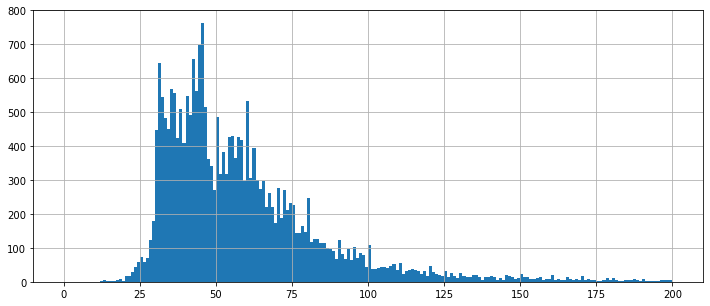

In [395]:
#площадь,
print('Параметры распределения общей площади:')
print(df['total_area'].describe())
#df['total_area'].hist(bins=100)
#plt.show()# видим, что львиная доля в диапазоне 0-200, так и обрежем для наглядности
df['total_area'].hist(bins=200, range=(0,200),figsize=(12,5))
plt.show()

Площадь в 900 метров будет сильно влиять на данные. Каковы нормальные значения?

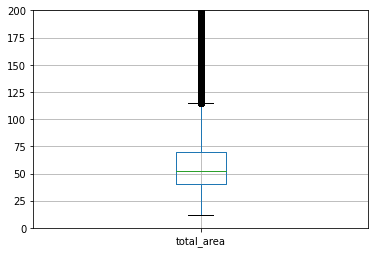

In [396]:
total_area_data = pd.DataFrame(df['total_area'])
total_area_data.boxplot()
plt.ylim(0,200)
plt.show()

Полтора межквартильных расстояния  от Q3 показывают, что мертаж квартиры более  115м. является аномальным.

Попробуем увидеть, как это повлияет на цену квадратного метра?

In [397]:
print('Средняя цена (тыс. руб.) квадратного метра для площади до 115 кв. м.:')
print(df.query('total_area <= 115')['price_m2'].mean(),'\n')

print('Средняя цена (тыс. руб.) квадратного метра для площади свыше 115 кв. м.:')
print(df.query('total_area > 115')['price_m2'].mean())

Средняя цена (тыс. руб.) квадратного метра для площади до 115 кв. м.:
95.57752868961836 

Средняя цена (тыс. руб.) квадратного метра для площади свыше 115 кв. м.:
161.18816762530813


161 тысяча за метр и 95 тысяч - огромная разница.

### Общая площадь
1. Большой хвост очень больших квартир, еще и более дорогих (в среднем)в придачу. Похоже тут скрыт сектор элитного жилья, которое стоило бы анализировать отдельно, для определения его характерной стоимости.

2. Некоторая неравномерность распределения вероятно может объясняться большим процентом 'типового' жилья.

Параметры распределения цены(млн. руб.):
count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


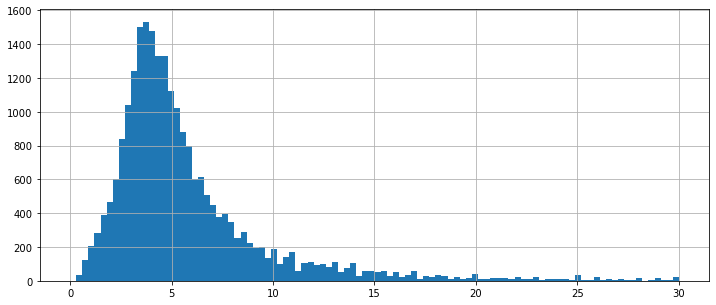

In [398]:
#цена,
print('Параметры распределения цены(млн. руб.):')
print(df['last_price'].describe())
#df['last_price'].hist(bins=100)
#plt.show()# выбросы сплющивают картину обрежем на 30 млн.
df['last_price'].hist(bins=100, range=(0,30),figsize=(12,5))
plt.show()

Выбросы в ценовых данных, такие как недвижимость за 12190 руб., или 763 млн. руб. размывают картинку, стоит почистить.

Каковы нормальные значения?

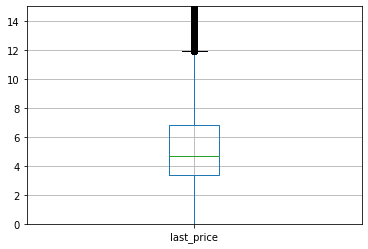

In [399]:
total_area_data = pd.DataFrame(df['last_price'])
total_area_data.boxplot()
plt.ylim(0,15)
plt.show()

### Цена
Хотя основной объем укладывается в квартиры до 12 млн руб., тут стоит учесть, что квартир с большими метражами на рынке гораздо меньше, что влияет на количество квартир с большой ценой, т.е. отсекать ценовые выбросы лучше по цене квадратного метра(иначе мы просто обрежем большие квартиры)


Изучим распределение стоимости квадратного метра.

Параметры распределения цены квадратного метра(млн. руб.):
count    23699.000000
mean        98.946791
std         50.308111
min          0.000000
25%         76.000000
50%         95.000000
75%        114.000000
max       1907.000000
Name: price_m2, dtype: float64


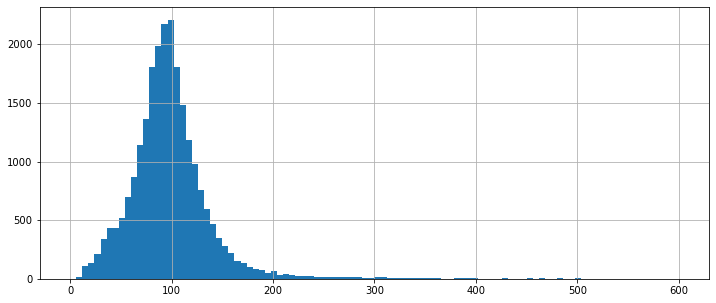

In [400]:
# стоимость квадратного метра
df['price_m2']
print('Параметры распределения цены квадратного метра(млн. руб.):')
print(df['price_m2'].describe())
df['price_m2'].hist(bins=100, range=(0,600),figsize=(12,5))
plt.show()

Определим, пределы нормальных значений.

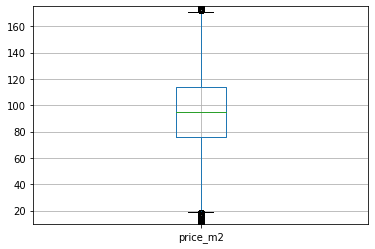

In [401]:
total_area_data = pd.DataFrame(df['price_m2'])
total_area_data.boxplot()
plt.ylim(10, 175)
plt.show()

### Цена квадратного метра
Как видно, распределение очень плотное, но есть и подозрительно дешевые и невероятно дорогие метры.
Для определения типовой стоимости целесообразно было бы рассматривать диапазон в пределах 20-170 тыс руб за метр. Если есть желание взять побольше данных, можно определить все,что не дороже 300т.р. за метр, как релевантное значение. Так мы не исключим из списка более или менее обычное премиум жилье.

Параметры распределения числа комнат:
count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


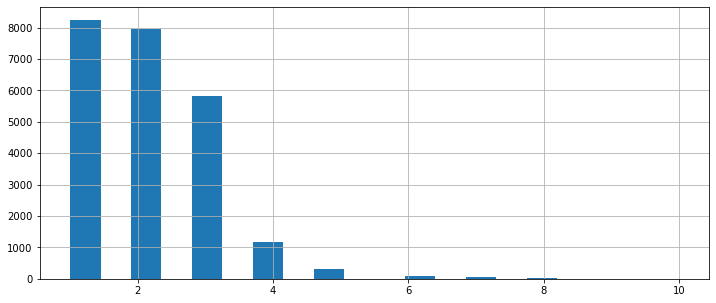

In [402]:
#число комнат,
print('Параметры распределения числа комнат:')
print(df['rooms'].describe())
df['rooms'].hist(bins=20, range=(1,10),figsize=(12,5))# видно, что предложений свыше 10 комнат почти нет, обрежем
plt.show()

Выглядит правдоподобно, медиана почти равна среднему значению.

Каковы нормальные значения?

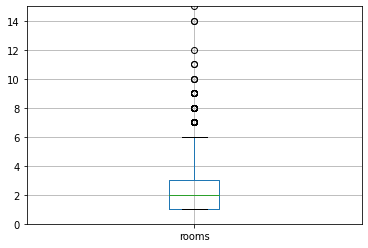

In [403]:
rooms_data = pd.DataFrame(df['rooms'])
rooms_data.boxplot()
plt.ylim(0,15)
plt.show()

### Число комнат
Хотя встречаются и очень многокомнатные квартиры, основной объем предложений лежит в пределах 6 комнат.

Параметры распределения высоты потолков:
count    14501.000000
mean         2.771800
std          1.261004
min          2.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


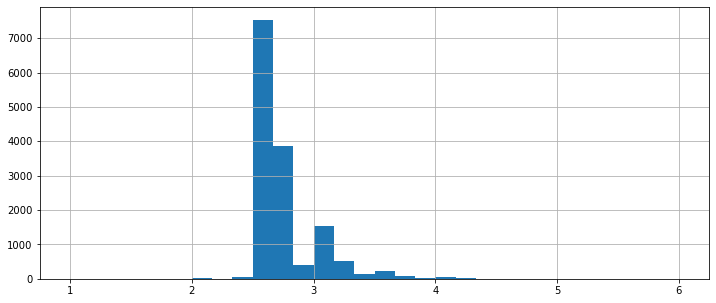

In [404]:
#высота потолков
print('Параметры распределения высоты потолков:')
print(df.query('ceiling_height != -111')['ceiling_height'].describe())#есть экстремальные значения, но их влияние на среднее мало.
df['ceiling_height'].hist(bins=30, range=(1,6),figsize=(12,5))# 
plt.show()

Распределение высоты потолков не равномерно, что может иметь естественные причины(доминирование некоторых типов советских планировок домов).

Посмотрим характеристики распределения.

(2.0, 3.25)

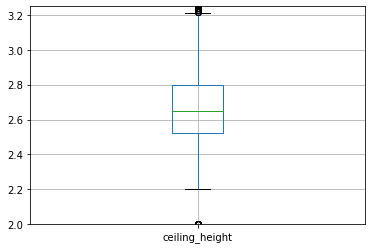

In [405]:
height_data = pd.DataFrame(df.query('ceiling_height != -111')['ceiling_height'])
height_data.boxplot()
plt.ylim(2,3.25)

### Высота потолков
Явные выбросы - квартиры ниже человеческого роста и квартиры высотой с вышку сотовой связи.
В целом - потолок меньше 2.2 м. - беспредел! Больше 3.2 м. - буржуйство!) Такие выброосы частью не соответствуют действительности, либо представлениям о поддающихся классификации и статистической оценке объектах жилья.

Изучим время продажи квартиры.
Для этого, отделим данные по уже проданным квартирам.

In [406]:
sell_time_data = df.query('days_exposition != -111')

print(sell_time_data['days_exposition'].describe(),'\n')
print('90% продаж укладываются в срок',np.percentile(sell_time_data['days_exposition'],90),'дней.')
print('75% продаж укладываются в срок',np.percentile(sell_time_data['days_exposition'],75),'дней.')

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64 

90% продаж укладываются в срок 460.0 дней.
75% продаж укладываются в срок 232.0 дней.


Значительная разница, между средним и медианным значениями говорит о возможном сильном загрязнении данных.

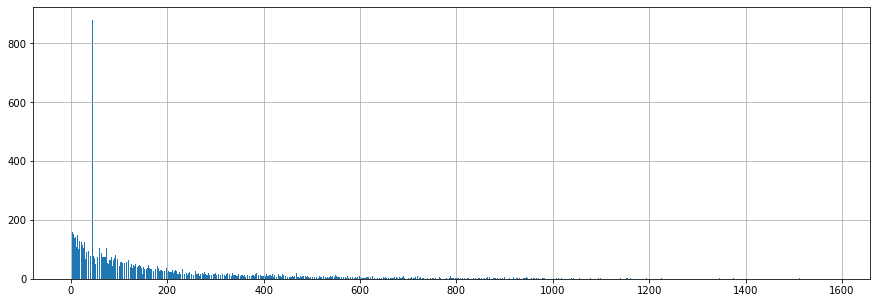

In [407]:
sell_time_data['days_exposition'].hist(bins=2000, figsize=(15,5))
plt.show()

1. очень длинный хвост, как будто некоторые объявления посто забывают закрыть
2. два аномально высоких значения выделяются из распределения

Попробуем определиться с нормой.

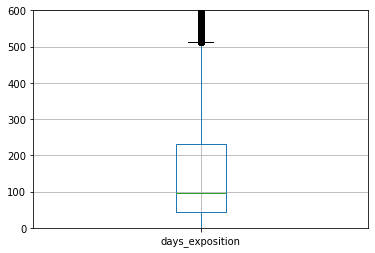

In [408]:
sell_time_frame = pd.DataFrame(sell_time_data['days_exposition'])
sell_time_frame.boxplot()
plt.ylim(0,600)
plt.show()

Продавать квартиру больше 500 дней - не нормально, возможно это действительно забытые до поры объявления.

Теперь определим, что за выдающееся значение?

In [409]:
print('Самые распространенные сроки продажи:')
print(sell_time_data['days_exposition'].value_counts(ascending=False).head(10))

Самые распространенные сроки продажи:
45    880
60    538
7     234
30    208
90    204
4     176
3     158
5     152
14    148
9     143
Name: days_exposition, dtype: int64


Аномально много объявлений со сроком продажи 45 и 60 дней.

Уберем из расчета значения 45 и 60 дней и отрежем хвост свыше 500 дней. Посмотрим, как изменятся характеристики распределения?

Распределение после очистки данных


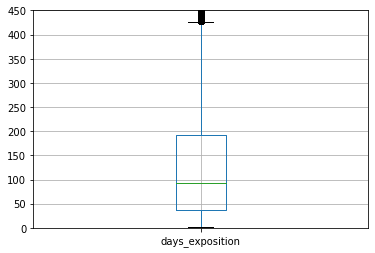

In [410]:
# обрезаем аномальные значения
sell_time_frame_clean = sell_time_frame.query('days_exposition !=45 and days_exposition !=60 and days_exposition <= 500')

#строим распределение
print('Распределение после очистки данных')
sell_time_frame_clean.boxplot()
plt.ylim(0,450)
plt.show()
#распределение плотнее, расстояние между средним и медианой меньше, данные чище

### Срок продажи
У данных две основные проблемы:
1. Очень длинный хвост. Продавать квартиру больше года странно, но многие продают и больше двух. Возможно некоторые объявления не закрывают после продажи квартиры, или они являются скрытой рекламой агентств недвижимости. В любом случае, многие из 'долгоиграющих' объявлений могут оказаться недействительными. Стоит рассматривать, только те, срок которых не выше 425 дней.
2. В распределении есть подозрительно 'круглые' сильно выдающиеся значения. Возможно сервисом предусмотрено автозакрытие объявлений не обновленных 45 и потом 60 дней. Так же возможно, что в эти сроки идет рассылка напоминаний о выставленных объявлениях(вспомнили и закрыли. В любом из этих случаев, данные о сроках продажи оказались бы недостоверными(требуется взаимодействие с заказчиком)

Проанализируем влияние наличия фотографии объекта на срок продажи.

Отберем случаи с ценой квадратного метра в пределах первого и третьего квартиля, чтобы цена, как более сильный фактор, не искажала результат.

In [411]:
print(df['price_m2'].describe())
norm_sell_data = df.query('price_m2 <= 114  and price_m2<= 76')

count    23699.000000
mean        98.946791
std         50.308111
min          0.000000
25%         76.000000
50%         95.000000
75%        114.000000
max       1907.000000
Name: price_m2, dtype: float64


Сколько всего таких объявлений  в изначальной выборке?

In [412]:
print('Объявлений без фото в основной выборке:')
print(df.query('is_image == 0')['is_image'].count())

Объявлений без фото в основной выборке:
1059


Посмотрим, сколько таких объявлений получилось в обрезанной выборке?

In [413]:
print('Объявлений без фото в среднем ценовом диапазоне кв. метра:')
print(norm_sell_data.query('is_image == 0')['is_image'].count())

Объявлений без фото в среднем ценовом диапазоне кв. метра:
328


328 - не много, но можно изучать.

Сравним медианные и средние сроки продажи квартир:

In [414]:
# в основной выборке
print('Медианный срок продажи в основной выборке:')
print(df['days_exposition'].median(),'\n')

# в квартирах без фото восновной выборке
print('Медианный срок продажи квартир без фото в основной выборке')
print(df.query('is_image == 0')['days_exposition'].median(),'\n')

# в квартирах без фото в среднем ценовом диапазоне кв. метра 
print('Медианный срок продажи квартир без фото в среднем ценовом диапазоне')
print(norm_sell_data.query('is_image == 0')['days_exposition'].median(),'\n')

Медианный срок продажи в основной выборке:
74.0 

Медианный срок продажи квартир без фото в основной выборке
59.0 

Медианный срок продажи квартир без фото в среднем ценовом диапазоне
45.0 



Данных маловато, но, во всяком случае, нельзя сказать, что отсутствие фото замедляет продажи.

Посмотрим, зависит ли цена квадратного метра от площади?

Корелляция цены квадратного метра и площади квартиры:
0.10758668898172907


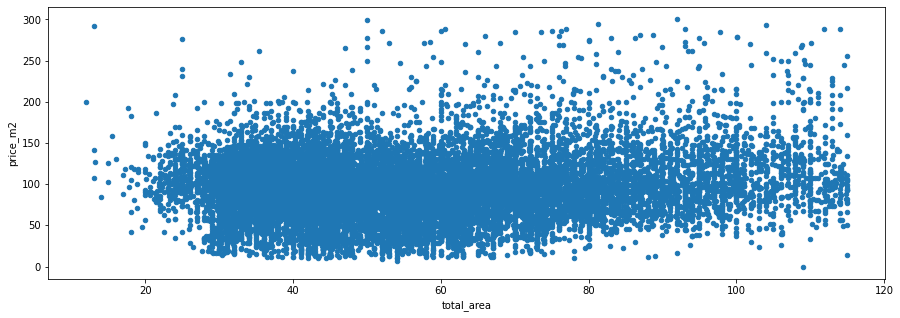

Средняя цена метра в квартирах до 60 кв. м.
92.45298975883713 

Средняя цена метра в квартирах более 60 кв. м.
99.59223700452613 



In [415]:
# выделяем релевантные значения в отдельный сет
total_area_data = df.query('total_area <= 115 and price_m2 <= 300')

# ищем прямую связь
print('Корелляция цены квадратного метра и площади квартиры:')
print(total_area_data['total_area'].corr(total_area_data['price_m2']))
# коррелляция очень слабая

#посмотрим на совместное распределение
total_area_data.plot(x = 'total_area', y = 'price_m2', kind = 'scatter', figsize=(15,5))
plt.show()

print('Средняя цена метра в квартирах до 60 кв. м.')
print(total_area_data.query('total_area <= 60')['price_m2'].mean(),'\n')
print('Средняя цена метра в квартирах более 60 кв. м.')
print(total_area_data.query('total_area > 60')['price_m2'].mean(),'\n')

Можно сказать, что среди больших квартир немного чаще встречаются более дорогие метры, но не намного. Фактор незначительный.

Зависит ли цена от числа комнат?

Корелляция цены квадратного метра и количества комнат:
-0.01918819977099812


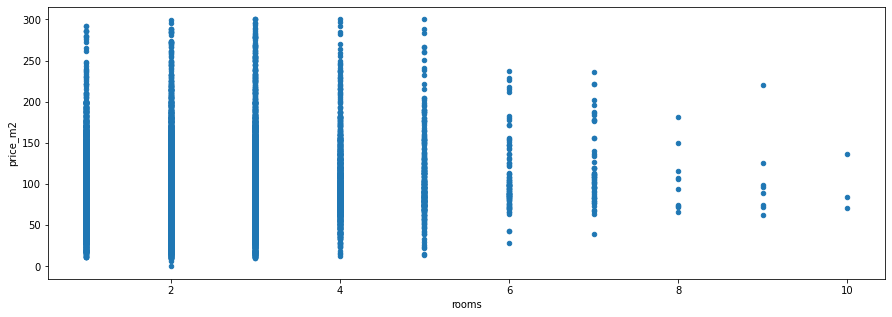

,price_m2
rooms,
1,99.924077
2,93.687824
3,93.230849
4,99.875657
5,107.427184
6,109.402062
7,119.654545
8,104.100000
9,104.750000


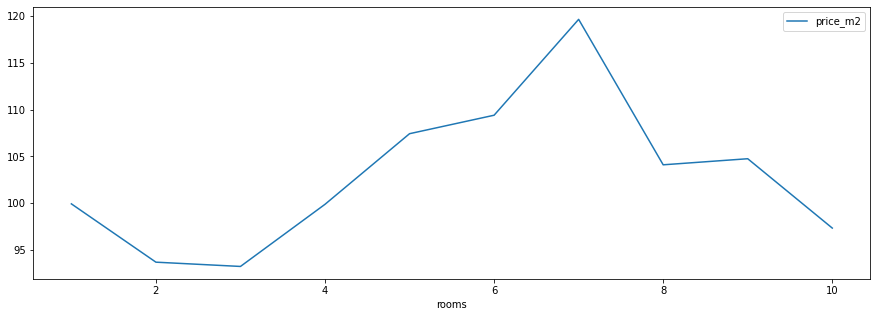

In [416]:
# выделяем релевантные значения в отдельный сет
rooms_data = df.query('rooms <= 10 and price_m2 <= 300')

# ищем прямую связь
print('Корелляция цены квадратного метра и количества комнат:')
print(rooms_data['rooms'].corr(rooms_data['price_m2']))
# коррелляция очень слабая

#посмотрим на совместное распределение
rooms_data.plot(x = 'rooms', y = 'price_m2', kind = 'scatter', figsize=(15,5))
plt.show()

#построим линейный график средних ценовых значений
rooms_data.pivot_table(index = 'rooms', values = 'price_m2').plot(figsize=(15,5))
rooms_data.pivot_table(index = 'rooms', values = 'price_m2')


Квартиры с большим количеством комнат скорее дешевле в расчете на квадратный метр, но связь снова слаба. Кроме того, квартир свыше 6 комнат маловато для релевантных выводов.

По данным линейного графика можно выделить три основные группы:
1. Квартиры до 3-х комнат включительно(цена падает с увеличением количества комнат)
2. Кварттиры с 4 до 7 комнат включительно (цена сильно растет с увеличением количества комнат)
3. Квартиры с количеством комнат свыше 7-ми. (цена падает с увеличением количества комнат)

В целом, самые дорогие квартиры(7 комнат)около 120 тыс. руб. за кв.м., а самые дешевые(3 комнаты) около 93 тыс. руб. за кв.м.
Разница 29%.

Посмотрим, зависит ли цена от удалённости от центра? 


 Корелляция цены квадратного метра и близости центра города:
-0.3977495667932305


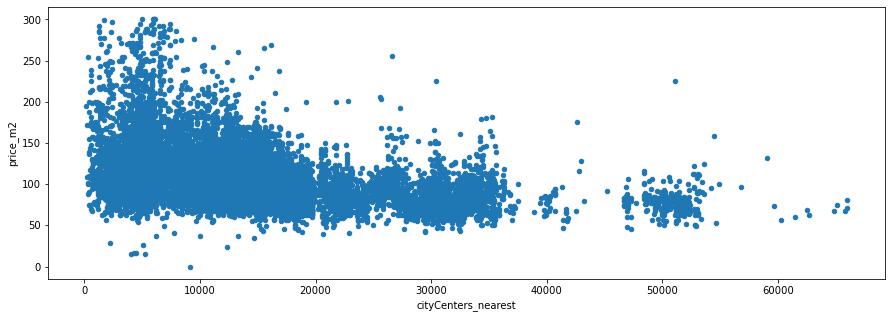

Средняя цена метра в пределах двух км. от центра
133.58389261744966 

Средняя цена метра в квартирах дальше двух км. от центра
106.55088333239262 

Разница составляет: -25.37% 



In [417]:
# выделяем релевантные значения в отдельный сет
cityCenters_nearest_data = df.query('cityCenters_nearest != -111 and price_m2 <= 300')

# ищем прямую связь
print('\n','Корелляция цены квадратного метра и близости центра города:')
print(cityCenters_nearest_data['cityCenters_nearest'].corr(cityCenters_nearest_data['price_m2']))
# коррелляция есть, не самая сильная, но есть

#посмотрим на совместное распределение
cityCenters_nearest_data.plot(x = 'cityCenters_nearest', y = 'price_m2', kind = 'scatter', figsize=(15,5))
plt.show()
# график подсказывает, что расстояние до центра влияет на стоимость метра, хотя среднестатистических цен в центре все же больше

print('Средняя цена метра в пределах двух км. от центра')
print(cityCenters_nearest_data.query('cityCenters_nearest <= 2000')['price_m2'].mean(),'\n')
print('Средняя цена метра в квартирах дальше двух км. от центра')
print(cityCenters_nearest_data.query('cityCenters_nearest > 2000')['price_m2'].mean(),'\n')
print('Разница составляет: {:.2%}'.format(1 - cityCenters_nearest_data.query('cityCenters_nearest <= 2000')['price_m2'].mean()/
                                      cityCenters_nearest_data.query('cityCenters_nearest > 2000')['price_m2'].mean()),'\n')


Расстояние до центра, один из наиболее существенных факторов.

Исследуем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

Частота распределения цены квадратного метра для крайних и не крайних этажей:


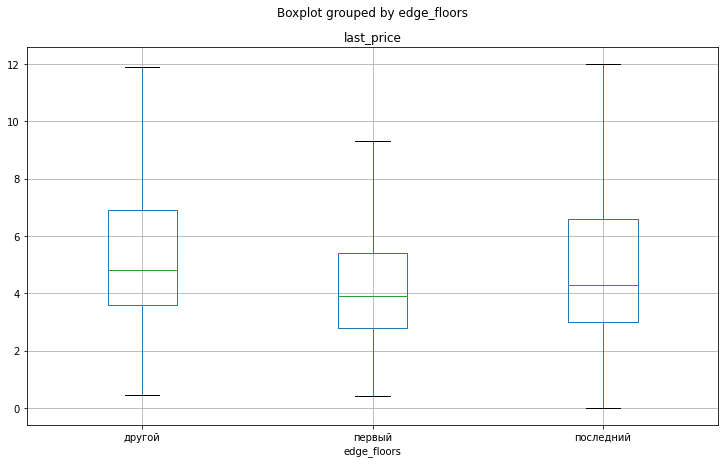

Крайние этажи в среднем дешевле на: 15.65% 



In [418]:
# выделяем релевантные значения в отдельный сет
edge_floors_data = df.query('edge_floors != "unknown" and price_m2 <= 300')

#посмотрим
print('Частота распределения цены квадратного метра для крайних и не крайних этажей:')
edge_floors_data.boxplot('last_price', by='edge_floors', showfliers=False, figsize=(12,7))
plt.show()
# крайние этажи в среднем дешевле

# на сколько?
print('Крайние этажи в среднем дешевле на: {:.2%}'.format(
1-(edge_floors_data.query('edge_floors == "первый" or edge_floors == "последний"')['price_m2'].mean())/
edge_floors_data.query('edge_floors == "другой"')['price_m2'].mean()),'\n')
# почти на 16%


Крайние этажи дешевле. Фактор слабее чем растояние от центра, можно сказать второго порядка.

Исследуем зависимость цены от даты размещения: дня недели, месяца и года.

                     price_m2
weekday_exposition           
0                   96.880780
1                   96.625000
2                   96.715624
3                   96.470174
4                   96.267254
5                   94.785826
6                   95.733294


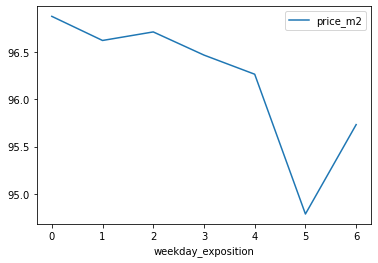

                   price_m2
month_exposition           
1                 97.139019
2                 95.971385
3                 96.593168
4                 97.701821
5                 95.947036
6                 94.008616
7                 96.136310
8                 96.813079
9                 97.259523
10                95.771010
11                97.282747
12                95.122688


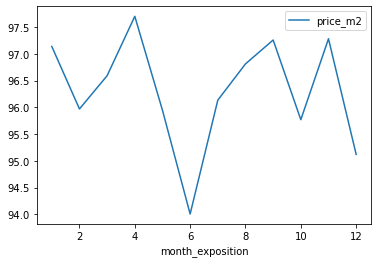

                   price_m2
year_exposition            
2014             114.416667
2015              97.906838
2016              94.394622
2017              94.563753
2018              95.792030
2019             103.715385


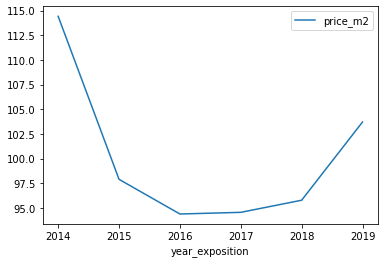

In [419]:
#влияет ли день недели?
weekday_dependence_data = df.query('price_m2 <= 300').pivot_table(index='weekday_exposition', values='price_m2')
print(weekday_dependence_data)
weekday_dependence_data.plot()
plt.show()
# лучше не выставлять в выходные), но если серьезно, разница очень мала

#влияет ли месяц?
month_dependence_data = df.query('price_m2 <= 300').pivot_table(index='month_exposition', values='price_m2')
print(month_dependence_data)
month_dependence_data.plot()
plt.show()
# разброс не велик, закономерностей не видно

#влияет ли год?
year_dependence_data = df.query('price_m2 <= 300').pivot_table(index='year_exposition', values='price_m2')
print(year_dependence_data)
year_dependence_data.plot()
plt.show()
# санкции оставили след и на рынке недвижимости(длинной в нескольео лет)


Макроэкономические факторы вызвали просадку около 17% по отношению к 14 году. День недели и месяц почти не влияют на цену. Но выставлять в субботу и в июне все же не стоит.

Исследуем цену квадратного метра в разрезе населенных пунктов.

In [420]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений.
biggest_locality = df['locality_name'].value_counts().head(10).index

#Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
biggest_locality_data = df.query('locality_name in @biggest_locality')
mean_locality_price = biggest_locality_data.pivot_table(index = 'locality_name', values = 'price_m2' )

#Выделим населённые пункты с самой высокой и низкой стоимостью жилья.
print(mean_locality_price.sort_values(by='price_m2', ascending=False))

                     price_m2
locality_name                
Санкт-Петербург    114.374594
Пушкин             102.655827
деревня Кудрово     91.983278
посёлок Парголово   89.737003
посёлок Мурино      85.281609
посёлок Шушары      78.179545
Колпино             74.952663
Гатчина             68.263844
Всеволожск          68.180905
Выборг              57.687764


Средняя стоимость метра в СПБ ровно в два раза выше чем в Выборге, остальные по середине.

Попробуем определить условную границу "центра" СПБ, по изменению цен, в зависимости от удаленности от центра.

<ipython-input-421-1e64a493870f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['cityCenters_km'] = (spb_data['cityCenters_nearest']/1000).astype('int')


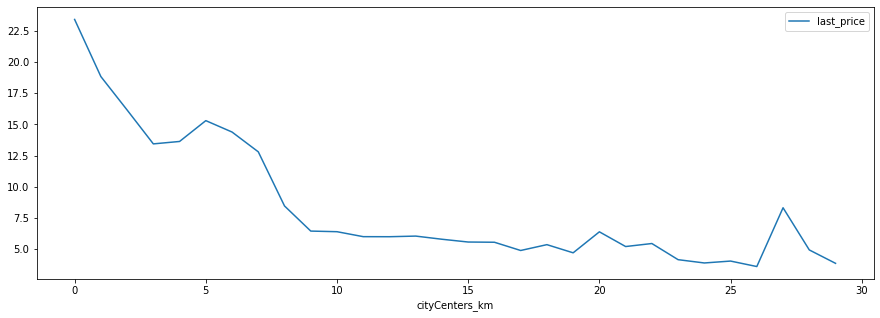

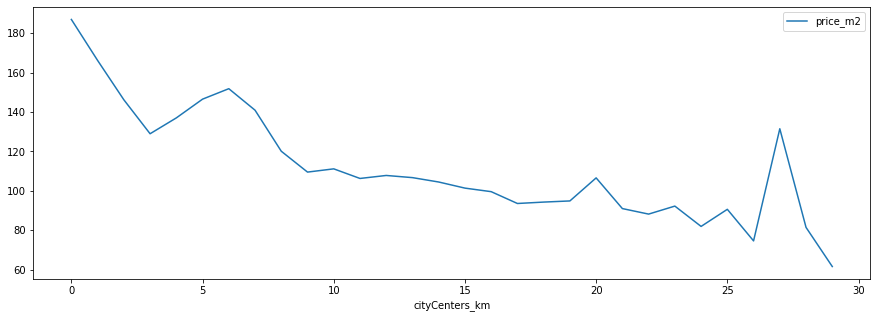

In [421]:
#Выделим квартиры в Санкт-Петербурге.
spb_data = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != -111' )

#Создаем столбец с расстоянием до центра в километрах. Округлим до целых значений.
spb_data['cityCenters_km'] = (spb_data['cityCenters_nearest']/1000).astype('int')

#посчитаем среднюю цену для каждого километра. 
spb_km_price = spb_data.pivot_table(index = 'cityCenters_km', values = ('price_m2', 'last_price'))

#Построим график: он должен показывать, как цена зависит от удалённости от центра.
spb_km_price.plot( y=('last_price'),figsize=(15,5)) # по общей стоимости объектов
spb_km_price.plot( y=('price_m2'),figsize=(15,5)) # по стоимости квадратного метра

Определим границу, где график сильно меняется — это и будет центральная зона.
Перелома два 3км и 9км (дальше 25км есть выброс, но он не в счет)
Я бы сказал, что 'ближний' центр находится в радиусе 3 км от географического , а все, что дальше радиуса 9км, уже 'загород'
 Это подтверждают и ЯндексКарты)

Теперь, когда условный "центр" определен,посмотрим на распределение параметров квартир в центре.

In [422]:
# Выделим сегмент квартир в центре. 
spb_center = spb_data.query('cityCenters_km <= 3')

# Проанализируем эту территорию и изучим следующие параметры:
#площадь, цена, число комнат,...
print('Описание данных квартир в центре СПБ',)
print(spb_center[['total_area','price_m2','rooms']].describe(),'\n')
print('Описание общих данных квартир в СПБ')
print(spb_data[['total_area','price_m2','rooms']].describe(),'\n')

#высота потолков(помним, что нужно обрезать выбросы)
print('Описание данных высоты потолков в центре СПБ',)
print(spb_center.query('ceiling_height != -111 and ceiling_height < 10 and ceiling_height >= 2')['ceiling_height'].describe(),'\n')
print('Описание общих данных высоты потолков квартир в СПБ')
print(spb_data.query('ceiling_height != -111 and ceiling_height < 10 and ceiling_height >= 2')['ceiling_height'].describe(),'\n')

Описание данных квартир в центре СПБ
        total_area     price_m2        rooms
count  1159.000000  1159.000000  1159.000000
mean     97.399172   145.518550     3.108714
std      55.772422   124.907819     1.551728
min      12.000000    28.000000     1.000000
25%      62.000000    95.000000     2.000000
50%      84.100000   116.000000     3.000000
75%     115.250000   149.500000     4.000000
max     517.000000  1907.000000    19.000000 

Описание общих данных квартир в СПБ
         total_area      price_m2         rooms
count  15660.000000  15660.000000  15660.000000
mean      64.658142    114.213410      2.178097
std       40.222451     52.371333      1.136461
min       12.000000      0.000000      1.000000
25%       42.000000     90.000000      1.000000
50%       55.000000    104.000000      2.000000
75%       74.500000    124.000000      3.000000
max      900.000000   1907.000000     19.000000 

Описание данных высоты потолков в центре СПБ
count    793.000000
mean       3.197150
s

Квартиры в центре в среднем примерно на 32 метра больше, на 31 тыс руб дороже за  кв.м., и на одну комнату больше чем в общем по городу. Потолки в центре в среднем тоже выше приблизительно на 44 см.

Выделим факторы, которые больше всего влияют на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления?

In [423]:
print('\n','Корреляция факторов по СПБ в целом')
spb_data.corr()['last_price'].to_frame().sort_values('last_price', ascending=False).style.background_gradient(cmap="Oranges")


 Корреляция факторов по СПБ в целом


,last_price
last_price,1.000000
price_m2,0.761235
total_area,0.655103
living_area,0.589283
rooms,0.372816
ponds_around3000,0.172485
parks_around3000,0.156058
total_images,0.097348
parks_nearest,0.068976
kitchen_area,0.064871


In [424]:
print('\n','Корреляция факторов в центре')
spb_center.corr()['last_price'].to_frame().sort_values('last_price', ascending=False).style.background_gradient(cmap="Oranges")


 Корреляция факторов в центре


,last_price
last_price,1.000000
price_m2,0.835403
total_area,0.532018
living_area,0.466978
rooms,0.244602
floor,0.223012
balcony,0.199307
total_images,0.143185
parks_around3000,0.093972
ponds_around3000,0.080263


За пределами центра города сильнее взаимосвязь с удаленностью от географического центра.
В центральной части города чуть больше взаимосвязь с этажом(в центре СПБ прекрасные виды).

Средняя цена квадратного метра на разных этажах в центре города


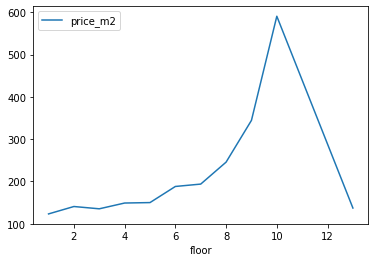

In [425]:
# с какого этажа лучше видно?)
print('Средняя цена квадратного метра на разных этажах в центре города')
floors_price = spb_center.pivot_table(index='floor', values='price_m2')
floors_price.plot()
#похоже с десятого

### 5. Выводы <a id=5></a>

1. Факторами наибольшего влияния на цену квадратного метра являются факторы локации:
-населенный пункт
-расстояние до центра

2. Факторами второго порядка являются:
- крайние и не крайние этажи(крайние дешевле в среднем на 15%)
- количество комнат(обратная корреляция в незначительной степени)
-  общий метраж(прямая корреляция в незначительной степени)

3. Для квартир расположенных в центре СПБ дополнительным фактором оказался этаж. Цена в среднем неуклонно растет вплоть до 10 этажа.
